# This is one of the most popular datatset names IRIS
### Here we evalaute the species of a flower given its sepal and petal dimensions. We'll apply majorly two different techniques over the dataset and let's watch out which works better on it.
-  Logistic Regression
-  K Nearest Neighbours

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import cross_validation

/home/netzwelt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.drop('Id', 1, inplace=True)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#naming the columns
iris.columns = ['Sepal_len', 'Sepal_wid', 'Petal_len', 'Petal_wid', 'Species']

### This is a plot between Sepal width and it's length in accordance with the species of the flower

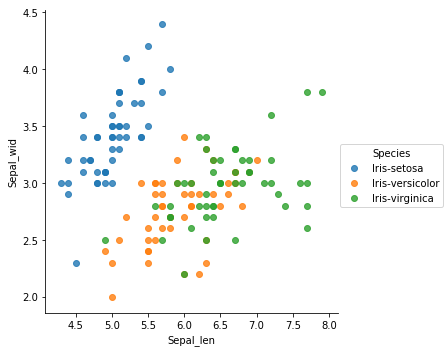

In [7]:
sns.lmplot("Sepal_len", "Sepal_wid", data=iris, hue="Species", fit_reg=False)

### This is a plot between Petal width and length in accordance with the species 

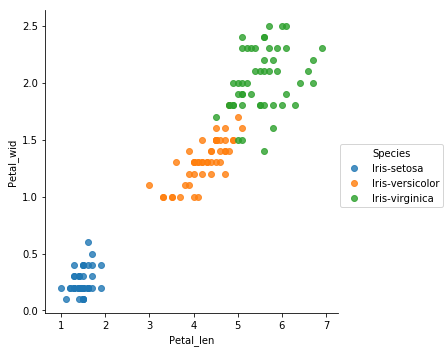

In [8]:
sns.lmplot("Petal_len", "Petal_wid", data=iris, hue="Species", fit_reg=False)  

In [9]:
X = np.array(iris.drop(["Species"],1))  
y = np.array(iris["Species"])  

### Train-Test split method used to split the data

In [28]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2, random_state=2)


### Using Logistic Regression

In [29]:
#importing the Logistic technique
from sklearn.linear_model import LogisticRegression  

In [30]:
#instance of the algorithm
clf = LogisticRegression()

In [31]:
#fitting the data
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
#predicting on the test data
config = clf.predict(X_test)

In [67]:
#finding the score of the logistic model
clf.score(X_test, y_test)

0.9333333333333333

### Using K NEAREST NEIGHBOURS

In [35]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [59]:
#object of the KNN method
knn = KNN(n_neighbors=10)

In [60]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [61]:
knn.predict(X_test)

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [63]:
#This is the score accuracy of the knn model
knn.score(X_test, y_test)

0.9666666666666667

- **Clearly it is know that the knn model is more accurate than the logistic model, hence we prefer knn**
 
- **Now we apply the Knn algorithm across various values of K to check the optimum model accuracy **

In [40]:
k_range = range(1,41)
k_scores = []

In [41]:
# k_scores will append all the accuracy scores of the knn model with the different k values
for k in k_range:
    clf = KNN(n_neighbors=k)
    clf.fit(X_train, y_train)
    scores = clf.score(X_test, y_test)
    k_scores.append(scores)
    

In [42]:
#taking the mean value out of all the scores
k_mean = np.mean(k_scores)

In [64]:
k_mean

0.9675

### Plotting the accuracy for different values for K

Text(0,0.5,'Cross-Validated Accuracy')

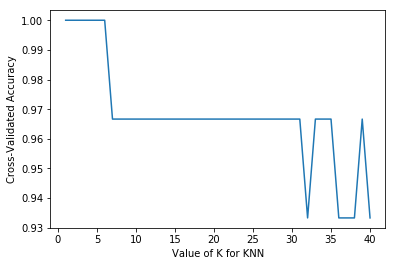

In [65]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

-  This plot shows that the model shows highest accuracy for values upto 6 
-  Later on the accuracy decreases sharply and even more decreases for higher values of K

### Now applying the knn method for the optimal value of k for the model accuracy 

In [68]:
knn = KNN(n_neighbors=4)

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [70]:
knn.score(X_test, y_test)

1.0

- Hence to sum up this , we found that the knn model is the better than the logistic model to accurately predict the test data set 
- Also we took account the various values of k to find the most appropriate values to increase the model efficiency and we found out the value ranging form (0-6) gives the highest model accuracy .
- Hence we select one of the these k value for our model